In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.api import *
import researchpy as rpy

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.isna().sum().sort_values(ascending=False)/len(df)

DEATH_EVENT                 0.0
time                        0.0
smoking                     0.0
sex                         0.0
serum_sodium                0.0
serum_creatinine            0.0
platelets                   0.0
high_blood_pressure         0.0
ejection_fraction           0.0
diabetes                    0.0
creatinine_phosphokinase    0.0
anaemia                     0.0
age                         0.0
dtype: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


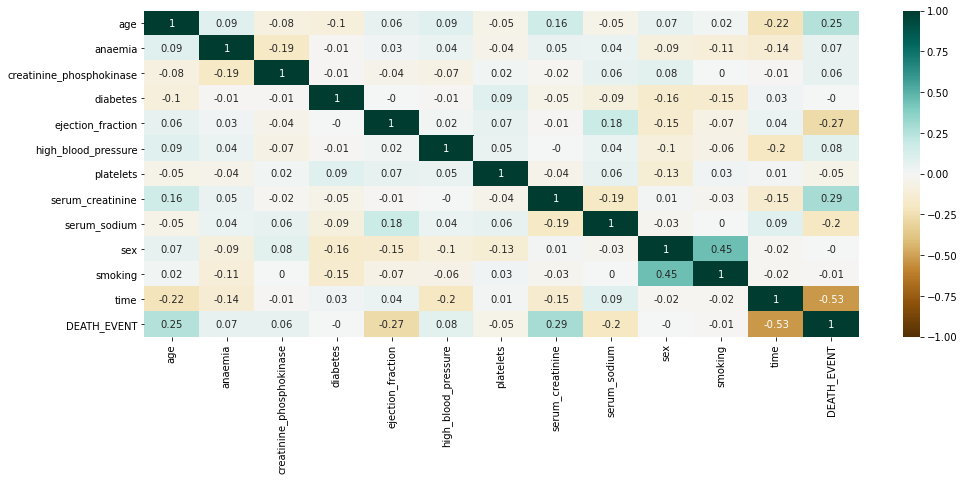

In [5]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.corr().round(2),vmin=-1, vmax=1, annot=True, cmap='BrBG')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

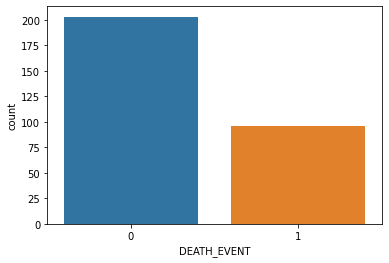

In [20]:
sns.countplot(x="DEATH_EVENT",data=df)

In [6]:
df_hf = df.loc[df['DEATH_EVENT']==1]
df_no_hf = df.loc[df['DEATH_EVENT']==0]

In [7]:
cat_features = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
num_features = [value for value in list(df.columns) if value not in cat_features and value != 'DEATH_EVENT']
print('Categorical features:',cat_features)
print('\nNumerical features:',num_features)

Categorical features: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Numerical features: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


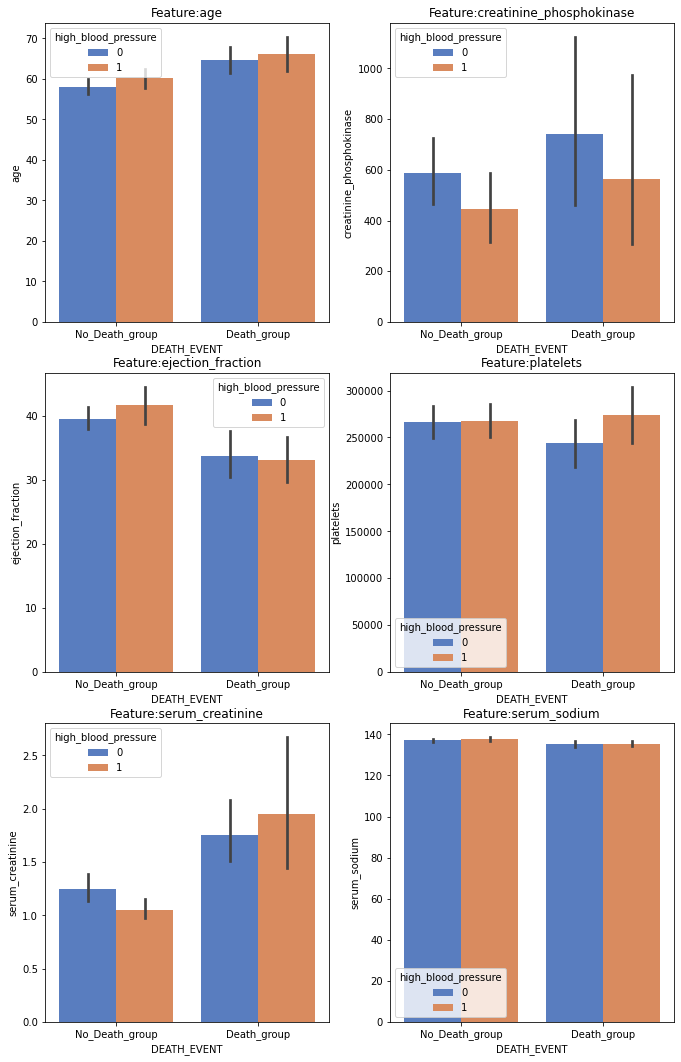

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.tight_layout(pad=3.0)

#ax = sns.barplot(x="DEATH_EVENT", y="", hue="sex", data=df)

for feature,ax in zip(num_features,axs.ravel()):
    ax = sns.barplot(ax=ax,x="DEATH_EVENT", y=feature, hue="high_blood_pressure",palette= 'muted', data=df)
    ax.set_title('Feature:'+ feature)
    ax.set_xticklabels(['No_Death_group','Death_group'])
    

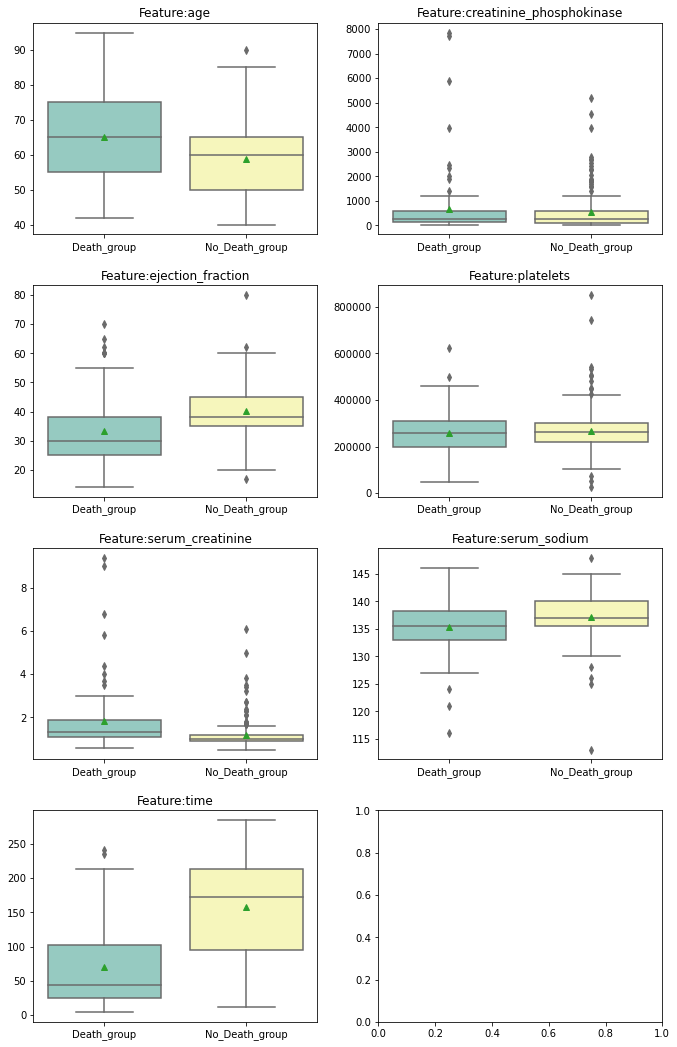

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
fig.tight_layout(pad=3.0)

for feature,ax in zip(num_features,axs.ravel()):
    sns.boxplot(ax=ax,data=[df_hf[feature],df_no_hf[feature]],palette="Set3",showmeans=True)
    ax.set_title('Feature:'+ feature)
    ax.set_xticklabels(['Death_group','No_Death_group'])
    

In [10]:
p_val = []
test_stat = []

for cat_feature in cat_features:
    ct = pd.crosstab(df['DEATH_EVENT'], df[cat_feature], margins=True)
    obs = np.array([ct.iloc[0][0:-1].values,
                    ct.iloc[1][0:-1].values])
    
    stat = st.chi2_contingency(obs)[0]
    p = st.chi2_contingency(obs)[1]
    
    test_stat.append(stat)
    p_val.append(p)
    
df_chi = pd.DataFrame(list(zip(p_val, test_stat)), columns =['p_value','test_stat'], 
                  index = cat_features,dtype = float)
df_chi

,p_value,test_stat
anaemia,0.307316,1.042175
diabetes,1.000000,0.000000
high_blood_pressure,0.214103,1.543461
sex,1.000000,0.000000
smoking,0.931765,0.007331


In [11]:
for feature in num_features:
    
    df_bp = df.copy()
    series = df_bp[feature]
    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    df_bp = df_bp[(series > Q1 - 1.5 * IQR) & (series < Q3 + 1.5 * IQR)]

    df_hf = df_bp.loc[df_bp['DEATH_EVENT']==1]
    df_no_hf = df_bp.loc[df_bp['DEATH_EVENT']==0]

    gp_hf = df_hf[feature]
    gp_no_hf = df_no_hf[feature]
    
    levene_pval = st.levene(gp_hf, gp_no_hf)[1]
    
    gp1_name = feature + '_gp1'
    gp2_name = feature + '_gp2'

    if levene_pval > 0.05:
        mean_stat, test_table = rpy.ttest(group1=gp_hf, group1_name = gp1_name,
                        group2=gp_no_hf, group2_name = gp2_name,
                        equal_variances= True)
        print('***************************************************************************')
        print(mean_stat,'\n\n',test_table,'\n')
    else:
        mean_stat, test_table = rpy.ttest(group1=gp_hf, group1_name = gp1_name,
                    group2=gp_no_hf, group2_name = gp2_name,
                    equal_variances= False)
        print('***************************************************************************')
        print(mean_stat,'\n\n',test_table,'\n')

***************************************************************************
   Variable      N       Mean         SD        SE  95% Conf.   Interval
0   age_gp1   96.0  65.215281  13.214556  1.348705  62.537763  67.892799
1   age_gp2  203.0  58.761906  10.637890  0.746634  57.289711  60.234101
2  combined  299.0  60.833893  11.894809  0.687895  59.480146  62.187640 

                       Welch's t-test   results
0  Difference (age_gp1 - age_gp2) =     6.4534
1              Degrees of freedom =   156.4868
2                               t =     4.1862
3           Two side test p value =     0.0000
4          Difference < 0 p value =     1.0000
5          Difference > 0 p value =     0.0000
6                       Cohen's d =     0.5600
7                       Hedge's g =     0.5585
8                   Glass's delta =     0.4884
9                     Pearson's r =     0.3173 

***************************************************************************
                       Variable   

In [4]:
x = df.iloc[:,0:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

rf_clf = RandomForestClassifier()
lda_clf = LinearDiscriminantAnalysis()
svm_clf = SVC()
logisreg_clf = LogisticRegression()
GB_clf = GradientBoostingClassifier()
    
clf_list = [rf_clf,lda_clf,svm_clf,logisreg_clf,GB_clf]

In [9]:
rf_clf_para = {"n_estimators":[10,20,30],
            "max_features":["auto", "sqrt", "log2"],
            "min_samples_split":[2,4,8],
            "bootstrap":[True, False],
            'criterion':['gini', 'entropy', 'log_loss']}

lda_clf_para = {'solver':['svd','lsqr','eigen'],
               'shrinkage':list(np.arange(0, 1, 0.01))}

svm_clf_para = {'C': [0.1,1, 10, 100],
                'gamma': [1,0.1,0.01,0.001],
                'kernel': ['rbf', 'sigmoid']}

logisreg_clf_para = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    "C":list(np.logspace(-3,3,7))}

GB_clf_para = { "subsample":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]
                }


clf_list = [rf_clf,lda_clf,svm_clf,logisreg_clf,GB_clf]

In [10]:

rf_clf_tuned= GridSearchCV(rf_clf,rf_clf_para,n_jobs=-1,cv=3,verbose=1)
rf_clf_tuned.fit(X_train,y_train)

lda_clf_tuned= GridSearchCV(lda_clf,lda_clf_para,n_jobs=-1,cv=3,verbose=1)
lda_clf_tuned.fit(X_train,y_train)

svm_clf_tuned= GridSearchCV(svm_clf,svm_clf_para,verbose=1,n_jobs=-1,cv=3)
svm_clf_tuned.fit(X_train,y_train)

logisreg_clf_tuned= GridSearchCV(logisreg_clf,logisreg_clf_para,n_jobs=-1,cv=3,verbose=1)
logisreg_clf_tuned.fit(X_train,y_train)

GB_clf_tuned= GridSearchCV(GB_clf,GB_clf_para,n_jobs=-1,cv=3,verbose=1,scoring="accuracy")
GB_clf_tuned.fit(X_train,y_train)

tuned_clf_list = [rf_clf_tuned,lda_clf_tuned,svm_clf_tuned,logisreg_clf_tuned,GB_clf_tuned]

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  58 out of  81 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    1.0s finished


## Prediction part

In [18]:


train_acc_list = []
test_acc_list = []

for clf,clf_name in zip(tuned_clf_list,clf_list):
        
    #clf.fit(X_train,y_train)
        
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    print('***************************************************************************')
    print(str(clf_name),': \n')
    #plot_roc_curve(clf, X_test, y_test)
    print('Training part:')
    print(classification_report(y_train, y_pred_train,
                                    target_names=['No heart failure', 'heart failure']))
    print('Testing part:')
    print(classification_report(y_test, y_pred_test,
                                    target_names=['No heart failure', 'heart failure']))
        
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))

***************************************************************************
RandomForestClassifier() : 

Training part:
                  precision    recall  f1-score   support

No heart failure       0.99      0.99      0.99       137
   heart failure       0.97      0.97      0.97        72

        accuracy                           0.98       209
       macro avg       0.98      0.98      0.98       209
    weighted avg       0.98      0.98      0.98       209

Testing part:
                  precision    recall  f1-score   support

No heart failure       0.92      0.92      0.92        66
   heart failure       0.79      0.79      0.79        24

        accuracy                           0.89        90
       macro avg       0.86      0.86      0.86        90
    weighted avg       0.89      0.89      0.89        90

***************************************************************************
LinearDiscriminantAnalysis() : 

Training part:
                  precision    recall  f

C:\Users\WCW20000306\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


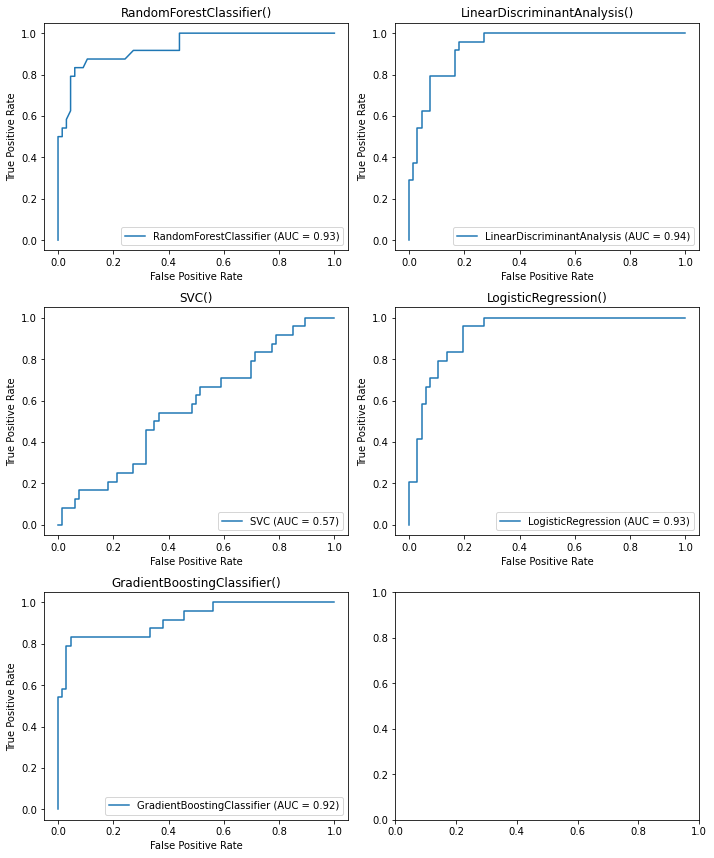

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12))

for clf, ax in zip(clf_list, axes.flatten()):
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    ax.title.set_text(str(clf))
fig.tight_layout(pad=1.0)
plt.show()

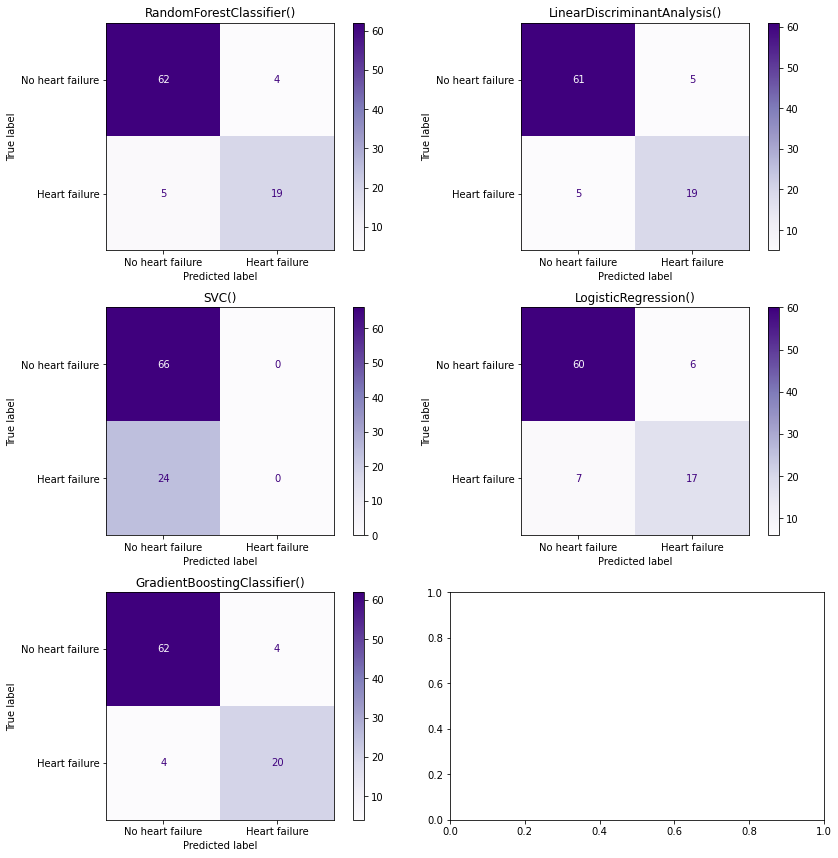

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

for clf, ax in zip(clf_list, axes.flatten()):
    plot_confusion_matrix(clf, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Purples',
                         display_labels=['No heart failure','Heart failure'])
    
    ax.title.set_text(str(clf))
fig.tight_layout(pad=1.0)
plt.show()

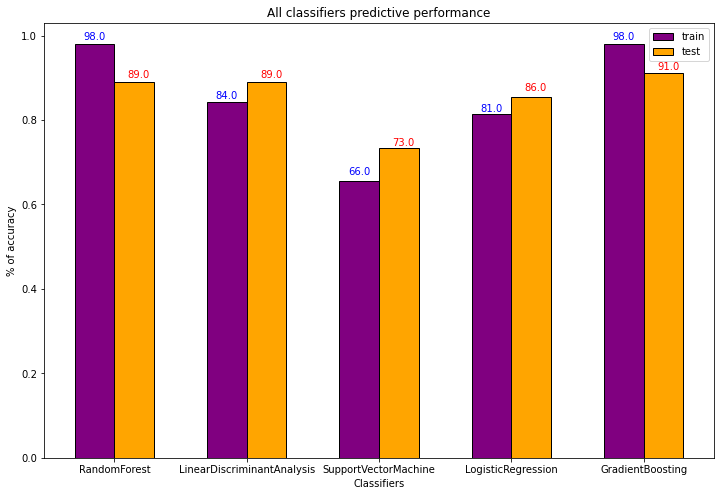

In [17]:
plt.figure(figsize=(12,8))

n = np.arange(5)
width = 0.3

plt.bar(n, train_acc_list, color = 'purple',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i].round(2)+0.01,train_acc_list[i].round(2)*100,
                 ha = 'center',color = 'blue')

plt.bar(n + width, test_acc_list, color = 'orange',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i].round(2)+0.01,test_acc_list[i].round(2)*100,color = 'red')

plt.xlabel("Classifiers")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")
  
plt.xticks(n + width/2,['RandomForest','LinearDiscriminantAnalysis',
                        'SupportVectorMachine','LogisticRegression','GradientBoosting'])
plt.legend()
  
plt.show()